In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
from python_tools.paths import base_name_from_path
import seaborn as sns
%matplotlib inline

In [2]:
data_folder = os.path.join('../dataset/csv_bird_data/')

In [3]:
all_csvs = glob(os.path.join(data_folder, '*.csv'))

In [4]:
all_csvs

['../dataset/csv_bird_data/species.data.csv',
 '../dataset/csv_bird_data/route.presence.absence.csv',
 '../dataset/csv_bird_data/in.train.csv',
 '../dataset/csv_bird_data/latlon.csv',
 '../dataset/csv_bird_data/in.test.csv',
 '../dataset/csv_bird_data/x.csv',
 '../dataset/csv_bird_data/fold.ids.csv']

In [6]:
# Load them into a dict
lookup = {base_name_from_path(x): pd.read_csv(x, index_col=0, encoding="ISO-8859-1") for x in all_csvs}

In [7]:
lookup.keys()

dict_keys(['species.data', 'route.presence.absence', 'in.train', 'latlon', 'in.test', 'x', 'fold.ids'])

In [36]:
np.squeeze(lookup['in.train'].values)

array([False,  True,  True, ..., False, False, False])

In [8]:
{x: y.shape for x, y in lookup.items()}

{'species.data': (371, 9),
 'route.presence.absence': (2769, 371),
 'in.train': (2769, 1),
 'latlon': (2769, 2),
 'in.test': (2769, 1),
 'x': (2769, 10),
 'fold.ids': (1612, 1)}

In [9]:
lookup['in.train'].sum()

x    1612
dtype: int64

In [10]:
lookup['route.presence.absence'].sum(axis=0).sort_values().head()

Long-billed Thrasher     13
Great Kiskadee           14
Black-chinned Sparrow    15
Barrow's Goldeneye       15
Willow Ptarmigan         15
dtype: int64

In [11]:
lookup['route.presence.absence'].sum(axis=0).sort_values(ascending=False).head()

Mourning Dove           2362
American Robin          2281
Red-winged Blackbird    2219
Brown-headed Cowbird    2133
American Crow           2117
dtype: int64

In [12]:
# Look at the train / test split
train_locs = lookup['latlon'][lookup['in.train']['x'].values]
test_locs = lookup['latlon'][lookup['in.test']['x'].values]

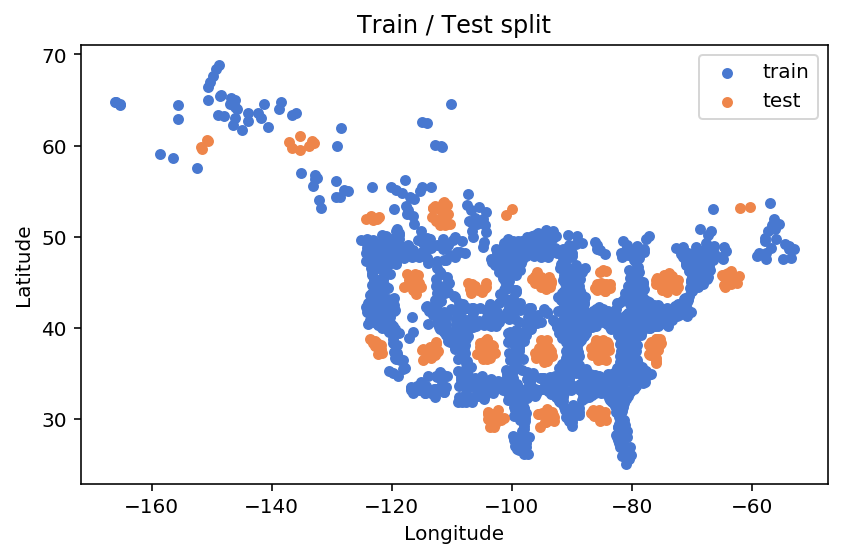

In [31]:
f, ax = plt.subplots(1, 1)

colours = sns.color_palette(palette='muted', n_colors=2)

train_locs.plot(x='Longitude', y='Latitude', kind='scatter', label='train', ax=ax, color=colours[0])
test_locs.plot(x='Longitude', y='Latitude', kind='scatter', label='test', ax=ax, color=colours[1])

ax.legend()

f.set_size_inches(6, 4)
plt.title('Train / Test split')
f.tight_layout()

plt.savefig('/Users/ingramm/Projects/uni_melb/phd/pre-confirmation/talk/bbs_mistnet.pdf')

In [14]:
covariates = lookup['x']
bio_var_cols = [x for x in covariates.columns if 'bio' in x]
bio_vars = covariates[bio_var_cols]

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = bio_vars.values
scaled = pd.DataFrame(scaler.fit_transform(data), index=bio_vars.index, columns=bio_vars.columns)

/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


/anaconda2/envs/py3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2961: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


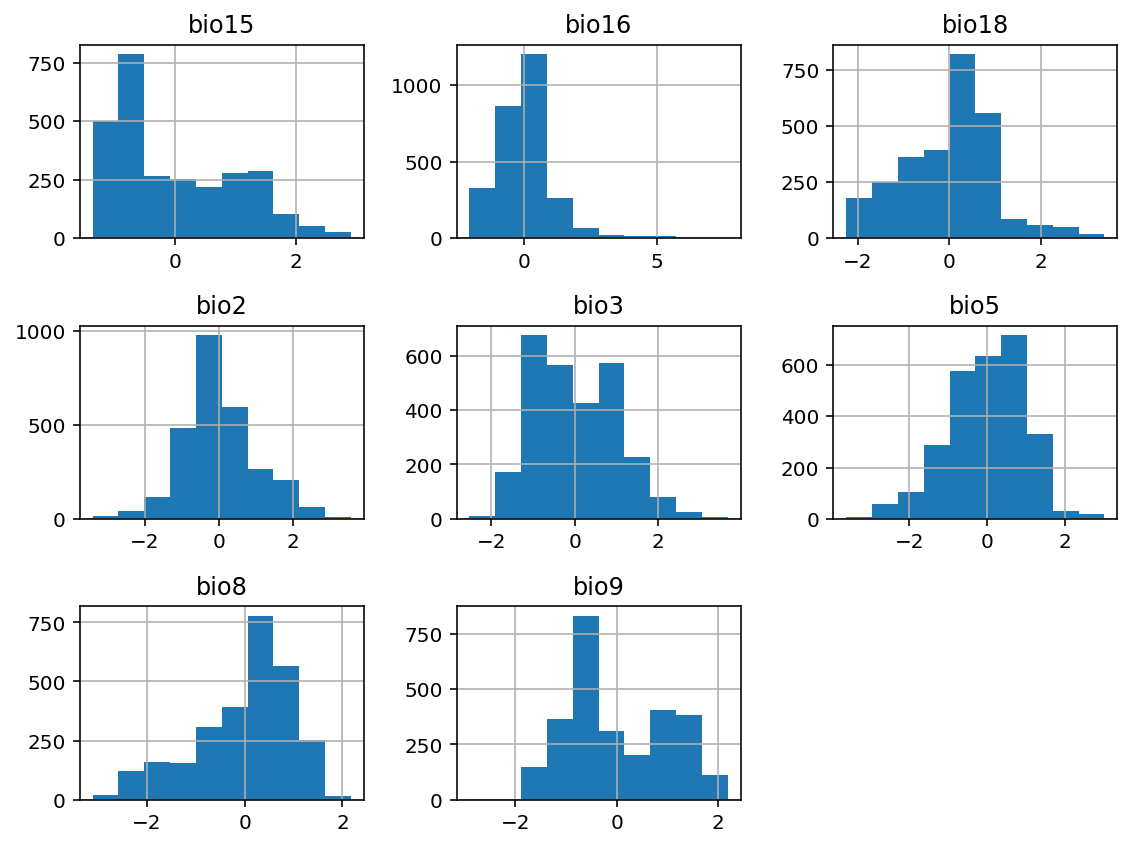

In [16]:
f, ax = plt.subplots(1, 1)

scaled.hist(ax=ax)

f.set_size_inches(8, 6)
f.tight_layout()